# Compare Multiple Files
You might be interested in comparing multiple books written by the same author, or just multiple books you like.

In [ ]:
## Uncomment the below lines if needed.
# !pip install pandas
# !pip install seaborn
# !pip install nltk

In [1]:
import os
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize

## File location information
Place all your files (and only those files) in one directory.
Replace the value for the `files_path` variable below with the path of this directory.

In [2]:
filenames = []
files_path = "./data/gutenberg/doyle/"
for file in os.listdir(files_path):
    if file.endswith(".txt"):
        filenames.append(os.path.join(files_path, file))

## Read the contents of all the books
We read the contents into a list of strings, where each string is a book.

In [3]:
file_contents = []

for filename in filenames :
    with open(filename, 'r', encoding='utf-8-sig') as fo :
        file_text = fo.read()
        file_contents.append(file_text)

## Calculate sentence lengths
Separate each file into sentences, and get the length of each sentence.
For a coarser calculation, we can as an alternative think of calculating the average sentence length for each paragraph.

In [4]:
def get_sentence_lengths(file_contents, plotby="sentence") :
    file_segment_lengths = []
    if plotby=="sentence" :
        for file_content in file_contents:
            sentences = sent_tokenize(file_content)
            sentence_words = [word_tokenize(s) for s in sentences]
            sentence_lengths = [len(w) for w in sentence_words]
            file_segment_lengths.append(sentence_lengths)
    elif plotby == "paragraph" :
        for file_content in file_contents:
            paragraphs = file_content.split("\n\n")
            paragraph_sent_lengths = []
            for paragraph in paragraphs :
                sentences = sent_tokenize(paragraph)
                sentence_words = [word_tokenize(s) for s in sentences]
                sentence_lengths = [len(w) for w in sentence_words]
                if len(sentence_lengths) > 0 :
                    avg_sentence_length = \
                        sum(sentence_lengths)/len(sentence_lengths)
                    paragraph_sent_lengths.append(avg_sentence_length)
                else :
                    continue
            file_segment_lengths.append(paragraph_sent_lengths)
    else :
        print("ERROR: 'plotby' can only take 'sentence' or 'paragraph' as values.")
        file_segment_lengths = None
    return file_segment_lengths

file_segment_lengths = get_sentence_lengths(file_contents, plotby="sentence")

Save all the information in a dataframe.

In [5]:
df_list = []
for ind, filename in enumerate(filenames) :
    s = file_segment_lengths[ind]
    indices = [ind for ind in range(len(s))]
    file = filename.split('/')[-1].split('.')[0]
    print("Dataframe content loaded for %s" % (file))
    df = pd.DataFrame({'title' : file, 'index' : indices, 'sentence length' : s})
    df_list.append(df)
books_df = pd.concat(df_list)
books_df.sample(5)

Dataframe content loaded for a-study-in-scarlet
Dataframe content loaded for the-sign-of-the-four
Dataframe content loaded for the-hound-of-the-baskervilles
Dataframe content loaded for the-lost-world
Dataframe content loaded for the-valley-of-fear


,title,index,sentence length
427,the-lost-world,427,15
15,the-valley-of-fear,15,39
759,a-study-in-scarlet,759,16
2260,the-valley-of-fear,2260,21
827,the-sign-of-the-four,827,4


## Plot sentence length information
This can be either done as a line chart, showing fluctuations in sentence lengths from the start to end of the book, or it can be plotted as a histogram.

### Sentence lengths in sequence as a line chart
Let's start with the line charts.

In [6]:
def plot_sentences(df, filename, max_norm = 200) :
    books_reordered_df = df.sort_values(by=['sentence length'])
    sns.set_style('ticks')
    sns.set_context('notebook', font_scale=1.5)
    g = sns.FacetGrid(books_reordered_df, row="title", height=3, aspect=10)
    g.map_dataframe(sns.lineplot, "index", "sentence length", alpha=1, lw=0.4)
    plt.savefig(filename, bbox_inches='tight')
    

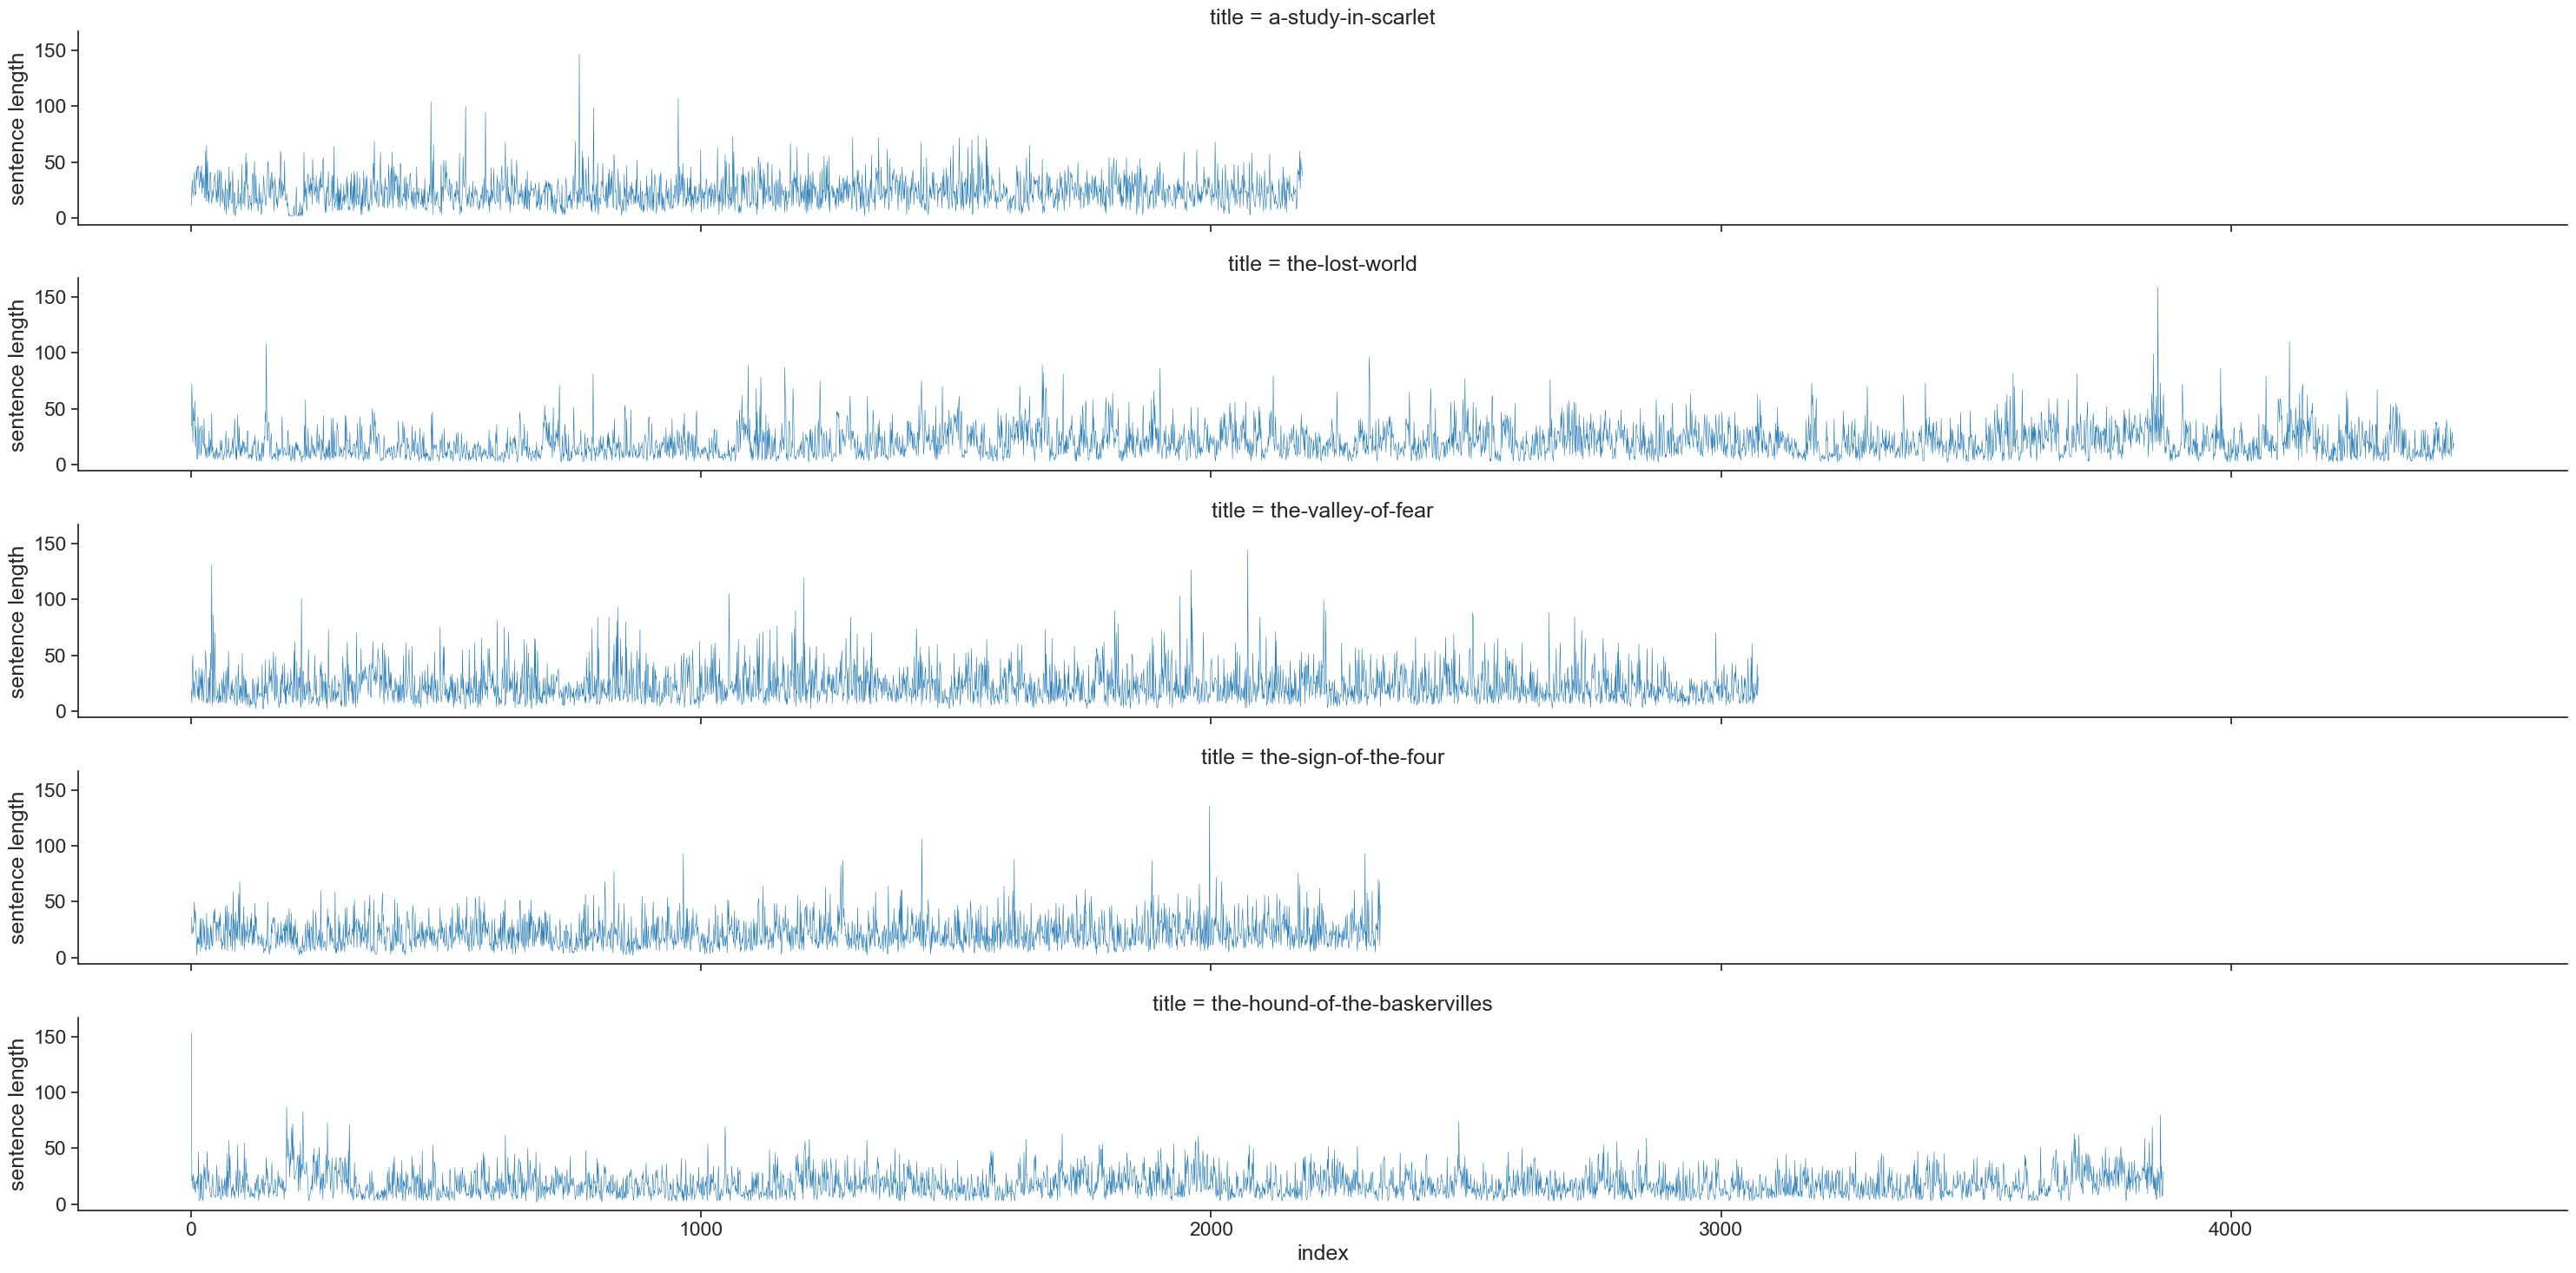

In [7]:
max_sentence_length = max(books_df['sentence length'].to_list())
plot_sentences(books_df, './plots/sentence_lengths_doyle.pdf',
               max_norm = max_sentence_length)

### Sentence lengths on a (2D) histogram
The histogram might be more informative. Let's try it out!

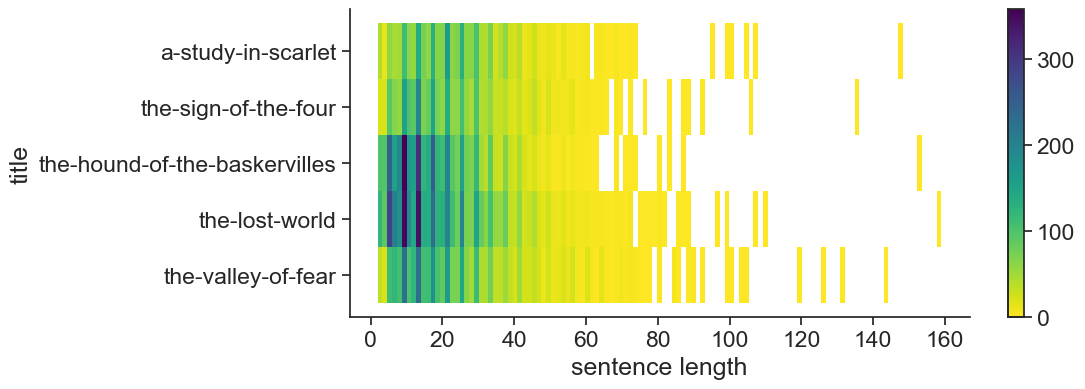

In [8]:
plt.figure(figsize=(10,4))
sns.set_style('ticks')
sns.histplot(data=books_df, y="title", x="sentence length",
             cmap='viridis_r', cbar=True)
sns.despine(right=True, top=True)

## Next Steps
What information do you get from the above plot? What does it look like if you compute and plot average sentence lengths (by paragraph)? What will you have to change to obtain the paragraph-level plot?